In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dane=pd.read_json('customersdata.txt', lines=True)

In [3]:
dane = pd.concat([dane.drop(['customer'], axis=1), dane['customer'].apply(pd.Series)], axis=1)

In [4]:
customers_df = dane.drop(columns=['orders', 'paymentMethods', 'transactions'])

In [5]:
customers_df.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [6]:
orders_df = pd.DataFrame()
paymentMethods_df = pd.DataFrame()
transactions_df = pd.DataFrame()

for single_customer in range(0, len(dane['orders']), 1):
    for order in dane['orders'][single_customer]:
        simple_df = pd.DataFrame([order])
        simple_df['customer_id'] = single_customer
        orders_df = orders_df.append(simple_df)
        
for single_customer in range(0, len(dane['paymentMethods']), 1):
    for paymentMethod in dane['paymentMethods'][single_customer]:
        simple_df = pd.DataFrame([paymentMethod])
        simple_df['customer_id'] = single_customer
        paymentMethods_df = paymentMethods_df.append(simple_df)
        
for single_customer in range(0, len(dane['transactions']), 1):
    for transaction in dane['transactions'][single_customer]:
        simple_df = pd.DataFrame([transaction])
        simple_df['customer_id'] = single_customer
        transactions_df = transactions_df.append(simple_df)

In [7]:
orders_df.head()

,orderAmount,orderId,orderShippingAddress,orderState,customer_id
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,0
0,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,0
0,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,1
0,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,1
0,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,1


In [8]:
paymentMethods_df.head()

,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,customer_id
0,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,0
0,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin,1
0,6krszxc05,Vertex Bancorp,VISA 16 digit,False,card,1
0,5z1szj2he,His Majesty Bank Corp.,Diners Club / Carte Blanche,False,card,1
0,m52tx8e1s,Vertex Bancorp,Mastercard,False,card,1


In [9]:
transactions_df.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,customer_id
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,0
0,yp6x27,wt07xm68b,26,False,y4wcv03i,0
0,nlghpa,41ug157xz,45,False,5mi94sfw,1
0,uw0eeb,41ug157xz,23,False,br8ba1nu,1
0,bn44oh,y3xp697jx,43,True,a33145ss,1


In [10]:
print('Total number of customers: {}'.format(len(customers_df)))

Total number of customers: 168


In [11]:
print('Total number of orders: {}'.format(len(orders_df)))

Total number of orders: 478


In [12]:
print('Total number of payment methods: {}'.format(len(paymentMethods_df)))

Total number of payment methods: 342


In [13]:
print('Total number of transactions: {}'.format(len(transactions_df)))

Total number of transactions: 623


In [14]:
print('Number of frauds in the set: {}'.format(customers_df['fraudulent'].sum()))

Number of frauds in the set: 61


In [15]:
print('Number of non-fraud in the set: {}'.format(len(customers_df) - customers_df['fraudulent'].sum()))

Number of non-fraud in the set: 107


In [16]:
print('Percentage of frauds in file: {}'.format(100*(customers_df['fraudulent'].sum() / len(customers_df))))

Percentage of frauds in file: 36.30952380952381


In [17]:
customers_df['customer_id'] = range(0, len(customers_df['fraudulent']), 1)
no_order_customers = set(customers_df['customer_id']) - set(orders_df['customer_id'])
print('Customerws without any orders (total: {}):\n{}'.format(len(no_order_customers), sorted(list(no_order_customers))))

Customerws without any orders (total: 27):
[9, 23, 34, 38, 40, 41, 43, 44, 47, 51, 54, 67, 70, 76, 82, 86, 96, 108, 116, 122, 125, 127, 133, 137, 139, 149, 150]


In [18]:
no_paymentMethod_customers = set(customers_df['customer_id']) - set(paymentMethods_df['customer_id'])
print('Customers without any payment method (total: {}):\n{}'.format(len(no_paymentMethod_customers), sorted(list(no_paymentMethod_customers))))

Customers without any payment method (total: 12):
[34, 38, 44, 47, 54, 70, 125, 133, 137, 139, 149, 150]


In [19]:
no_transactions_customers = set(customers_df['customer_id']) - set(transactions_df['customer_id'])
print('Customers without any transactions (total: {}):\n{}'.format(len(no_transactions_customers), sorted(list(no_transactions_customers))))

Customers without any transactions (total: 27):
[9, 23, 34, 38, 40, 41, 43, 44, 47, 51, 54, 67, 70, 76, 82, 86, 96, 108, 116, 122, 125, 127, 133, 137, 139, 149, 150]


In [20]:
strange_clients = no_order_customers.intersection(no_paymentMethod_customers).intersection(no_transactions_customers)
print('Customers without any order, payment methods and transcations (total: {}):\n{}'.format(len(strange_clients), sorted(list(strange_clients))))

Customers without any order, payment methods and transcations (total: 12):
[34, 38, 44, 47, 54, 70, 125, 133, 137, 139, 149, 150]


In [21]:
customers_df[customers_df['customer_id'].isin(strange_clients)]

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,customer_id
34,False,zbennett@frazier.com,995.449.5115x498,zxdd5co6f5pylq9it4x0,e03d:db6e:f5ca:b9cd:d64f:80fe:6177:26e1,89773 Peterson Course Suite 625\nEast Amandabo...,34
38,False,xwang@white.com,592.309.4963x427,1qj6z7funp3l28ym8trh,7891:9f08:9ac6:c816:7c58:26cd:ff2c:7ddc,"139 Ramirez Island Suite 885\nNew Joan, MT 69993",38
44,False,gsimpson@cox.org,+23(4)1428642270,nf0i429dh2h2fmf287ec,20.34.8.37,"32514 Freeman Court\nPort Waltermouth, SC 34012",44
47,False,johnsonjennifer@yahoo.com,1-670-969-5075x27186,yqt388sj7f142rohzukc,172.191.99.44,"6395 Christopher Lakes Suite 062\nSouth Dana, ...",47
54,False,zthomas@gmail.com,731.957.1783x62296,7p70n6q6zbgfhiqqqsxy,ad37:7b02:70fb:4b74:bc77:cd13:1bed:2483,"01494 Anderson Corners Suite 314\nDaviston, SC...",54
70,False,brockmatthew@hotmail.com,800.814.4655x012,132m3ourosp5a28ksvou,188.74.171.130,"08645 Alvarado Way Suite 514\nMillerfurt, AL 8...",70
125,False,wbeltran@ramirez-shaffer.com,1-627-545-5097x7356,z0uxvp8sio7nyv7op58j,1b75:d451:c48a:12:cfc7:bc1e:d748:ee62,"4873 Perez Groves\nWest Gregoryburgh, NH 45193...",125
133,True,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",133
137,False,stephanie21@reyes-spencer.biz,990.862.5466x7247,r526953keh7ctxcf9lnh,96eb:8d53:678:53ba:599b:5db6:3fe3:3218,"31068 Vance Forks Suite 516\nNew Christopher, ...",137
139,False,bhorne@fuller-nelson.com,1-512-954-5541,dgfa5pe2t45d1u6ox33l,118e:7887:94b6:b2a7:d2ad:8f35:c241:3149,"25653 Key Gateway\nPort Robert, PA 64370",139


In [22]:
customers_df[customers_df['customer_id'].isin(no_order_customers.intersection(no_transactions_customers))]

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,customer_id
9,True,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",9
23,True,guerramichael@hotmail.com,299-883-0904,webmbgi39hwejv3d90kt,245.38.171.222,"13553 Michelle Freeway Apt. 290\nTammyhaven, G...",23
34,False,zbennett@frazier.com,995.449.5115x498,zxdd5co6f5pylq9it4x0,e03d:db6e:f5ca:b9cd:d64f:80fe:6177:26e1,89773 Peterson Course Suite 625\nEast Amandabo...,34
38,False,xwang@white.com,592.309.4963x427,1qj6z7funp3l28ym8trh,7891:9f08:9ac6:c816:7c58:26cd:ff2c:7ddc,"139 Ramirez Island Suite 885\nNew Joan, MT 69993",38
40,True,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",40
41,False,smithtiffany@davis-perkins.com,384.291.0196x66623,czrv4aped9e2ndgv89b5,141.224.72.49,1862 Melanie Islands Apt. 152\nNorth Williamha...,41
43,False,knichols@gmail.com,(664)946-1521x6991,w0ykvw2nrcc03lx6logd,43.108.40.6,"1742 Regina Turnpike Suite 295\nWest Austin, D...",43
44,False,gsimpson@cox.org,+23(4)1428642270,nf0i429dh2h2fmf287ec,20.34.8.37,"32514 Freeman Court\nPort Waltermouth, SC 34012",44
47,False,johnsonjennifer@yahoo.com,1-670-969-5075x27186,yqt388sj7f142rohzukc,172.191.99.44,"6395 Christopher Lakes Suite 062\nSouth Dana, ...",47
51,False,whodges@yahoo.com,791-857-3838x784,c0zsrf0sna9bkdhncxk3,26a2:b5fa:e76c:cf72:577b:ea46:3b20:16b0,"839 Heather Mall Suite 257\nLake Robert, AL 60...",51


In [23]:
clients_to_delete = set(no_order_customers.union(no_paymentMethod_customers).union(no_transactions_customers))

In [24]:
customers_df['strange_customerEmail'] = 0
customers_df['strange_paymentMethodIssuer'] = 0
customers_df['ipv4'] = 0
customers_df['ipv6'] = 0
customers_df['repeated_customerIPAddress'] = 0
customers_df['repeated_customerEmail'] = 0
customers_df['repeated_customerBillingAddress'] = 0
customers_df['customerEmailDomainPublic'] = 0

In [25]:
customers_df.loc[customers_df['customerEmail'].str.contains('\.') == False, 'strange_customerEmail'] = 1

In [26]:
customers_df.loc[customers_df['customerIPAddress'].str.contains('\.') == True, 'ipv4'] = 1

In [27]:
customers_df.loc[customers_df['customerIPAddress'].str.contains('\:') == True, 'ipv6'] = 1

In [28]:
#what IP repeats?
customers_df[customers_df.duplicated(['customerIPAddress'])].drop_duplicates()['customerIPAddress']

80     45.203.99.249
88     45.203.99.249
141    45.203.99.249
Name: customerIPAddress, dtype: object

In [29]:
customers_df.loc[customers_df['customerIPAddress'].str.contains('45.203.99.249') == True, 'repeated_customerIPAddress'] = 1

In [30]:
#what mail repeats?
customers_df[customers_df.duplicated(['customerEmail'])].drop_duplicates()['customerEmail']

40     johnlowery@gmail.com
45     johnlowery@gmail.com
65     johnlowery@gmail.com
79     johnlowery@gmail.com
133    johnlowery@gmail.com
155    johnlowery@gmail.com
165    johnlowery@gmail.com
Name: customerEmail, dtype: object

In [31]:
customers_df.loc[customers_df['customerEmail'].str.contains('johnlowery@gmail.com') == True, 'repeated_customerEmail'] = 1

In [32]:
#what address repeated?
customers_df[customers_df.duplicated(['customerBillingAddress'])].drop_duplicates()['customerBillingAddress'].tolist()[0]

'49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708'

In [33]:
customers_df.loc[customers_df['customerBillingAddress'].str.contains('49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708') == True, 'repeated_customerBillingAddress'] = 1

In [34]:
#checking if above works
customers_df[customers_df.duplicated(['customerBillingAddress'])].drop_duplicates()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,customer_id,strange_customerEmail,strange_paymentMethodIssuer,ipv4,ipv6,repeated_customerIPAddress,repeated_customerEmail,repeated_customerBillingAddress,customerEmailDomainPublic
80,True,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,80,0,0,1,0,1,0,1,0
90,True,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,90,0,0,0,1,0,0,1,0


In [35]:
#how many public and private domains?
customers_df['customerEmail'].str.split('@',expand=True).reset_index().rename(columns={0:'customerEmailLogin', 1:'customerEmailDomain'}).groupby('customerEmailDomain').count().sort_values('customerEmailLogin', ascending=False).head(5)

,index,customerEmailLogin
customerEmailDomain,,
gmail.com,31,31
yahoo.com,29,29
hotmail.com,23,23
wright.com,3,3
jones.com,2,2


In [36]:
customers_df.loc[customers_df['customerEmail'].str.contains('gmail.com|yahoo.com|hotmail.com') == True, 'customerEmailDomainPublic'] = 1

In [37]:

orders_df['orderAmountCategory'] = pd.cut(orders_df['orderAmount'], bins=[0,33,66,100], labels=[1,2,3]).fillna(3).tolist()

In [38]:
orders_by_amountCategory = orders_df.groupby(['customer_id', 'orderAmountCategory'])['orderId'].count().unstack().add_prefix('orderAmountCategory_').fillna(0).reset_index()
orders_by_amountCategory.head()

orderAmountCategory,customer_id,orderAmountCategory_1,orderAmountCategory_2,orderAmountCategory_3
0,0,2.0,0.0,0.0
1,1,1.0,2.0,0.0
2,2,3.0,0.0,0.0
3,3,2.0,1.0,0.0
4,4,1.0,3.0,3.0


In [39]:
orders_by_state = orders_df.groupby(['customer_id', 'orderState'])['orderId'].count().unstack().fillna(0).add_prefix('orders_').reset_index()
orders_by_state.head()

orderState,customer_id,orders_failed,orders_fulfilled,orders_pending
0,0,0.0,1.0,1.0
1,1,0.0,3.0,0.0
2,2,1.0,2.0,0.0
3,3,0.0,3.0,0.0
4,4,1.0,6.0,0.0


In [40]:
orders_value_sum = orders_df.groupby(['customer_id'])['orderAmount'].sum().reset_index().rename(columns={'orderAmount': 'orders_value_sum'})
orders_value_sum.head()

,customer_id,orders_value_sum
0,0,44
1,1,111
2,2,82
3,3,85
4,4,411


In [41]:
orders_all = orders_df.groupby(['customer_id'])['orderId'].count().reset_index().rename(columns={'orderId': 'orders_sum'})
orders_all.head()

,customer_id,orders_sum
0,0,2
1,1,3
2,2,3
3,3,3
4,4,7


In [42]:
orders_repeatedAddress = orders_df.drop_duplicates('orderShippingAddress').groupby(['customer_id']).count().reset_index()[['customer_id', 'orderAmount']].rename(columns={'orderAmount': 'unique_orderShippingAddress'})
orders_repeatedAddress.head()

,customer_id,unique_orderShippingAddress
0,0,1
1,1,3
2,2,2
3,3,2
4,4,2


In [43]:
#check if there are customers with outlining orders
outlier_clients_to_delete = orders_df[orders_df['orderAmount'] > orders_df['orderAmount'].quantile(0.999)]['customer_id'].tolist()

In [44]:
orders_df[orders_df['customer_id'].isin(outlier_clients_to_delete)]

,orderAmount,orderId,orderShippingAddress,orderState,customer_id,orderAmountCategory
0,353,32rax6,"9596 Christian Bridge\nWest Nicholasbury, OR 9...",fulfilled,55,3


In [45]:
#strange payment institution
strange_paymentMethodIssuer_customer_ids = paymentMethods_df[paymentMethods_df['paymentMethodIssuer'].str.len() == 1]['customer_id'].drop_duplicates().tolist()
customers_df.loc[customers_df['customer_id'].isin(strange_paymentMethodIssuer_customer_ids), 'strange_paymentMethodIssuer'] = 1

In [46]:
test_df = paymentMethods_df.drop_duplicates(['customer_id', 'paymentMethodIssuer'])
paymentMethods_issuers = test_df.groupby('customer_id').paymentMethodIssuer.size().reset_index().rename(columns={'paymentMethodIssuer': 'unique_paymentMethodIssuer'})
paymentMethods_issuers.head()

,customer_id,unique_paymentMethodIssuer
0,0,1
1,1,6
2,2,2
3,3,1
4,4,4


In [47]:
test_df2 = paymentMethods_df.drop_duplicates(['customer_id', 'paymentMethodProvider'])
paymentMethods_providers = test_df2.groupby('customer_id').paymentMethodProvider.size().reset_index().rename(columns={'paymentMethodProvider': 'unique_paymentMethodProvider'})
paymentMethods_providers.head()

,customer_id,unique_paymentMethodProvider
0,0,1
1,1,6
2,2,2
3,3,1
4,4,4


In [48]:
paymentMethods_registrations = paymentMethods_df.groupby(['customer_id', 'paymentMethodType'])['paymentMethodId'].count().unstack().fillna(0).add_prefix('paymentMethod_').reset_index()
paymentMethods_registrations.head()

paymentMethodType,customer_id,paymentMethod_apple pay,paymentMethod_bitcoin,paymentMethod_card,paymentMethod_paypal
0,0,0.0,0.0,1.0,0.0
1,1,0.0,2.0,5.0,0.0
2,2,0.0,0.0,2.0,0.0
3,3,0.0,0.0,1.0,0.0
4,4,3.0,0.0,3.0,0.0


In [49]:
paymentMethods_types = paymentMethods_df.groupby(['customer_id', 'paymentMethodRegistrationFailure'])['paymentMethodId'].count().unstack().fillna(0).add_prefix('paymentMethod_').reset_index()
paymentMethods_types.head()

paymentMethodRegistrationFailure,customer_id,paymentMethod_False,paymentMethod_True
0,0,0.0,1.0
1,1,6.0,1.0
2,2,2.0,0.0
3,3,1.0,0.0
4,4,6.0,0.0


In [50]:
paymentMethods_all = paymentMethods_df.groupby(['customer_id'])['paymentMethodId'].count().reset_index().rename(columns={'paymentMethodId': 'paymentMethod_all'})
paymentMethods_all.head()

,customer_id,paymentMethod_all
0,0,1
1,1,7
2,2,2
3,3,1
4,4,6


In [52]:
transactions_df['transactionAmountCategory'] = pd.cut(transactions_df['transactionAmount'], bins=[0,33,66,100], labels=[1,2,3]).fillna(3).tolist()

In [53]:
transactions_by_transactionAmount = transactions_df.groupby(['customer_id', 'transactionAmountCategory'])['transactionId'].count().unstack().add_prefix('transactionAmountCategory_').fillna(0).reset_index()
transactions_by_transactionAmount.head()

transactionAmountCategory,customer_id,transactionAmountCategory_1,transactionAmountCategory_2,transactionAmountCategory_3
0,0,2.0,0.0,0.0
1,1,1.0,2.0,0.0
2,2,5.0,0.0,0.0
3,3,2.0,1.0,0.0
4,4,1.0,3.0,3.0


In [54]:
transactions_by_state = transactions_df.groupby(['customer_id', 'transactionFailed'])['transactionId'].count().unstack().fillna(0).add_prefix('transactions_').reset_index()
transactions_by_state.head()

transactionFailed,customer_id,transactions_False,transactions_True
0,0,2.0,0.0
1,1,2.0,1.0
2,2,3.0,2.0
3,3,3.0,0.0
4,4,5.0,2.0


In [55]:
transactions_value_sum = transactions_df.groupby(['customer_id'])['transactionAmount'].sum().reset_index().rename(columns={'transactionAmount': 'transactions_value_sum'})
transactions_value_sum.head()

,customer_id,transactions_value_sum
0,0,44
1,1,111
2,2,131
3,3,85
4,4,411


In [56]:
transactions_all = transactions_df.groupby(['customer_id'])['transactionId'].count().reset_index().rename(columns={'transactionId': 'transaction_all'})
transactions_all.head()

,customer_id,transaction_all
0,0,2
1,1,3
2,2,5
3,3,3
4,4,7


In [57]:
#checking client without outliner transaction
outlier_transactions_clients_to_delete = transactions_df[transactions_df['transactionAmount'] > transactions_df['transactionAmount'].quantile(0.999)]['customer_id'].tolist()

In [58]:
transactions_df[transactions_df['customer_id'].isin(outlier_transactions_clients_to_delete)]


,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,customer_id,transactionAmountCategory
0,32rax6,73a2hlmnm,353,True,ftiso5mr,55,3


In [59]:
#Creating a comprehensive set with variables for the model

features_df = customers_df[['customer_id', 'fraudulent', 'strange_customerEmail',\
                            'strange_paymentMethodIssuer', 'ipv4', 'ipv6',\
                            'repeated_customerIPAddress', 'repeated_customerEmail',\
                            'repeated_customerBillingAddress', 'customerEmailDomainPublic']]
features_df.head()

,customer_id,fraudulent,strange_customerEmail,strange_paymentMethodIssuer,ipv4,ipv6,repeated_customerIPAddress,repeated_customerEmail,repeated_customerBillingAddress,customerEmailDomainPublic
0,0,False,0,0,1,0,0,0,0,1
1,1,True,0,0,1,0,0,0,0,1
2,2,False,0,0,0,1,0,0,0,1
3,3,False,0,0,0,1,0,0,0,1
4,4,True,0,0,1,0,0,0,0,0


In [60]:
feature_dfs = [orders_by_state, orders_value_sum, orders_all, paymentMethods_registrations,\
               paymentMethods_types, paymentMethods_all, transactions_by_state,\
               transactions_value_sum, transactions_all, orders_repeatedAddress,\
               paymentMethods_issuers, paymentMethods_providers, orders_by_amountCategory,\
               transactions_by_transactionAmount ]
for single_feature in feature_dfs:
    features_df = pd.merge(features_df, single_feature, how='left', on='customer_id')

In [61]:
#removing uncomfortable customers
features_df_clean = features_df[~features_df['customer_id'].isin(set(list(clients_to_delete) + outlier_transactions_clients_to_delete + outlier_clients_to_delete))]

In [62]:
features_df_clean.head()

,customer_id,fraudulent,strange_customerEmail,strange_paymentMethodIssuer,ipv4,ipv6,repeated_customerIPAddress,repeated_customerEmail,repeated_customerBillingAddress,customerEmailDomainPublic,...,transaction_all,unique_orderShippingAddress,unique_paymentMethodIssuer,unique_paymentMethodProvider,orderAmountCategory_1,orderAmountCategory_2,orderAmountCategory_3,transactionAmountCategory_1,transactionAmountCategory_2,transactionAmountCategory_3
0,0,False,0,0,1,0,0,0,0,1,...,2.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
1,1,True,0,0,1,0,0,0,0,1,...,3.0,3.0,6.0,6.0,1.0,2.0,0.0,1.0,2.0,0.0
2,2,False,0,0,0,1,0,0,0,1,...,5.0,2.0,2.0,2.0,3.0,0.0,0.0,5.0,0.0,0.0
3,3,False,0,0,0,1,0,0,0,1,...,3.0,2.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0
4,4,True,0,0,1,0,0,0,0,0,...,7.0,2.0,4.0,4.0,1.0,3.0,3.0,1.0,3.0,3.0


In [63]:
#checking if everything is well harmonized
features_df_clean.isna().sum()

customer_id                        0
fraudulent                         0
strange_customerEmail              0
strange_paymentMethodIssuer        0
ipv4                               0
ipv6                               0
repeated_customerIPAddress         0
repeated_customerEmail             0
repeated_customerBillingAddress    0
customerEmailDomainPublic          0
orders_failed                      0
orders_fulfilled                   0
orders_pending                     0
orders_value_sum                   0
orders_sum                         0
paymentMethod_apple pay            0
paymentMethod_bitcoin              0
paymentMethod_card                 0
paymentMethod_paypal               0
paymentMethod_False                0
paymentMethod_True                 0
paymentMethod_all                  0
transactions_False                 0
transactions_True                  0
transactions_value_sum             0
transaction_all                    0
unique_orderShippingAddress        0
u

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


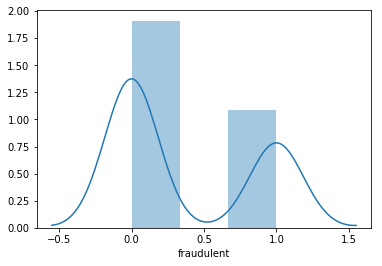

In [90]:
sns.distplot(dane.fraudulent)


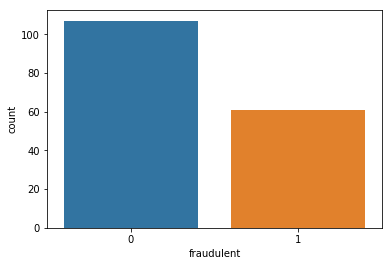

In [91]:
sns.countplot(dane.fraudulent)

Description of model component variables 
Independent variable:

fraudulent - whether the customer is a fraud or not
Dependent variables (aggregated from various sources to the base level of a particular customer):

customers collection:

_strange_customerEmail_ - is the e-mail address provided by the customer strange (no format)
_strange_paymentMethodIssuer_ - is the issuer of the payment method weird (single letter names)
ipv4 - is the IP in ipv4 format?
ipv6 - is the IP in ipv6 format?
_repeated_customerIPAddress_ - whether the IP assigned to this client is not unique (i.e. it was also assigned to other clients)
_repeated_customerEmail_ - is the email assigned to this client unique (i.e. was also assigned to other clients)
_repeated_customerBillingAddress_ - whether the address assigned to this customer is not unique (i.e. was also assigned to other customers)
customerEmailDomainPublic - is the domain from which the email originates "trusted"
orders set:

_orders_failed_ - total number of orders with status failed
_orders_fulfilled_ - total number of orders with the status of fulfilled
_orders_pending_ -total number of orders with pending status
_orders_value_sum_ - total value of orders
_orders_sum_ - total number of orders
_orderAmountCategory_1_ - total number of orders between 0 and 33 (3) percentile
_orderAmountCategory_2_ - total number of orders with a value between 34-66. (6) percentile
_orderAmountCategory_3_ - total number of orders with a value between 67-100 percentile
_unique_orderShippingAddress_ - total number of unique addresses
collection of payments:

_paymentMethod_apple pay_ - total number of apple pay payment methods
_paymentMethod_bitcoin_ - total number of bitcoin payment methods
_paymentMethod_card_ - total number of card payment methods
_paymentMethod_paypal_ - total number of paypal payment methods
_paymentMethod_False_ - total number of payment methods with False status
_paymentMethod_True_ - total number of payment methods with True status
_paymentMethod_all_ - total number of payment methods
_unique_paymentMethodIssuer_ - total number of unique payment issuers
_unique_paymentMethodProvider_ - total number of unique payment types
set of transactions:

_transactions_False_ - total number of transactions with False status
_transactions_True_ - total number of transactions with True status
_transactions_value_sum_ - total value of the transaction
_transaction_all_ - total number of transactions
_transactionAmountCategory_1_ - total number of transactions between 0-33. (3) percentile
_transactionAmountCategory_2_ - total number of transactions with a value between 34-66. (6) percentile
_transactionAmountCategory_3_ - total number of transactions with values ​​between 67-100 percentile

Creating Model

In [64]:
labels = np.array(features_df_clean['fraudulent'])
features = features_df_clean.loc[:, 'strange_customerEmail':'transactionAmountCategory_3']
feature_list = list(features.columns)
features = np.array(features)

In [65]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(features, labels, 
                                                    test_size = 0.25, random_state = 23)

In [66]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 23)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [67]:
predictions = rf.predict(test_x)

In [68]:
'Model relevance on training set: {}'.format(accuracy_score(train_y, rf.predict(train_x)))

'Model relevance on training set: 1.0'

In [69]:
'Model relevance on test set: {}'.format(accuracy_score(test_y, predictions))

'Model relevance on test set: 0.8285714285714286'

[Text(0,0.5,'Not-fraud'), Text(0,1.5,'Fraud')]

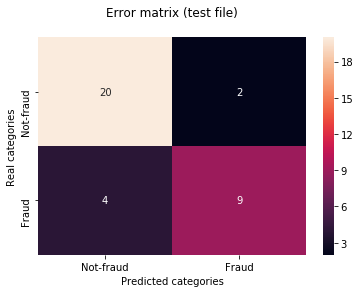

In [70]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(test_y, predictions), annot=True, ax = ax)
ax.set_xlabel('Predicted categories')
ax.set_ylabel('Real categories')
ax.set_title('Error matrix (test file)\n')
ax.xaxis.set_ticklabels(['Not-fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not-fraud', 'Fraud'])

In [71]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [72]:
importances_df = pd.DataFrame(feature_importances).rename(columns={0: 'variable', 1:'importance'}).sort_values('importance', ascending=True).set_index('variable')

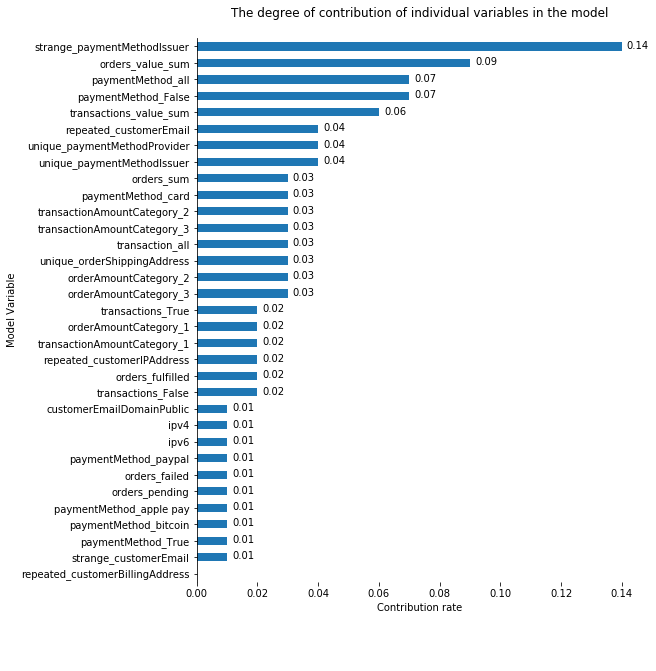

In [73]:
ax = importances_df.plot.barh(figsize=(8,10), title='The degree of contribution of individual variables in the model\n')
ax.set_xlabel('Contribution rate')
ax.set_ylabel('Model Variable')
ax.get_legend().remove()
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()-0.5), xytext=(5, 10), textcoords='offset points')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

Comment on the chart

Most of the variables significantly contributing to the classification model are based on data on transactions, orders or payment type :

_orders_value_sum_ - total value of orders
_paymentMethod_all_ - total number of payment methods
_paymentMethod_False_ - total number of payment methods with False status
_transactions_value_sum_ - total value of the transaction
_unique_paymentMethodIssuer_ - total number of unique payment issuers
_unique_paymentMethodProvider_ - total number of unique payment types
In fact, fewer variables that contribute significantly to the model describe the customer himself:

_repeated_customerEmail_ - is the email assigned to this client unique (i.e. was also assigned to other clients)
On this basis, it can be assumed that catching fraudulent transactions should generally be based more on searching for financial anomalies than describing the characteristics of the client.

It is also worth noting that the variable _strange_paymentMethodIssuer_ most contributes to the model - its presence results from the analysis carried out at the same level of data mining (already then you could already have suspicions as to customers who have one-letter entries in the field). It is also worth noting that another variable was created at a similar stage of the analysis (_strange_CustomerEmail_; e-mail address provided in an incorrect form) does not continue so significantly to the model.